# BreastCancer Diagnostic with Perceptron

In [13]:
import pandas as pd # for loading data csv into dataframe and cleaning data
import os # for building url path
import numpy as np 
import matplotlib.colors # will use ListedColorMap to plot results
import matplotlib.pyplot as pp

## Read in cancer data from the machine learning database

In [14]:
cancer_data_url = os.path.join ('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'breast-cancer-wisconsin', 'breast-cancer-wisconsin.data')
cancer_data = pd.read_csv(cancer_data_url, header=None, encoding='utf-8')
cancer_data.columns = ['id', 'thickness', 'size uniformity', # assign columns more useful names
                       'shape uniformity', 'marginal adhesion',
                       'epi cell size', 'bare nuclei', 'bland chromatin',
                       'normal nucleoi', 'mitoses', 'class']

In [26]:
def plot_classes_by_columns(super_plot, frame, c1, c2, num=2, denom=3):
    malignants = frame.loc[frame['class'] == 4]
    benigns = frame.loc[frame['class'] == 2]
    
    num_maligns = int((len(malignants.index) / denom) * num)
    num_benigns = int((len(benigns.index) / denom) * num)
    
    super_plot.scatter(malignants[c1].values[:num_maligns], malignants[c2].values[:num_maligns], color='red', marker='o', label='malignant')
    super_plot.scatter(benigns[c1].values[:num_benigns], benigns[c2].values[:num_benigns], color='blue', marker='x', label='benign')
    
y = cancer_data.iloc[:466,10].values # the array of target values: 2 for benign, 4 for malignant
y = np.where(y == 4, -1, 1) # change class labels 2 and 4 to -1 and 1 respectively

X = cancer_data.iloc[:466, [1,7]].values

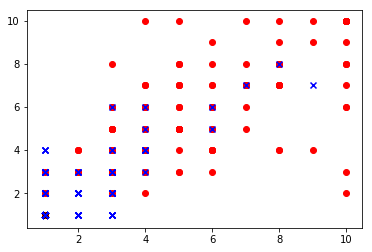

In [37]:
plot_classes_by_columns(pp, cancer_data, 'size uniformity', 'shape uniformity')

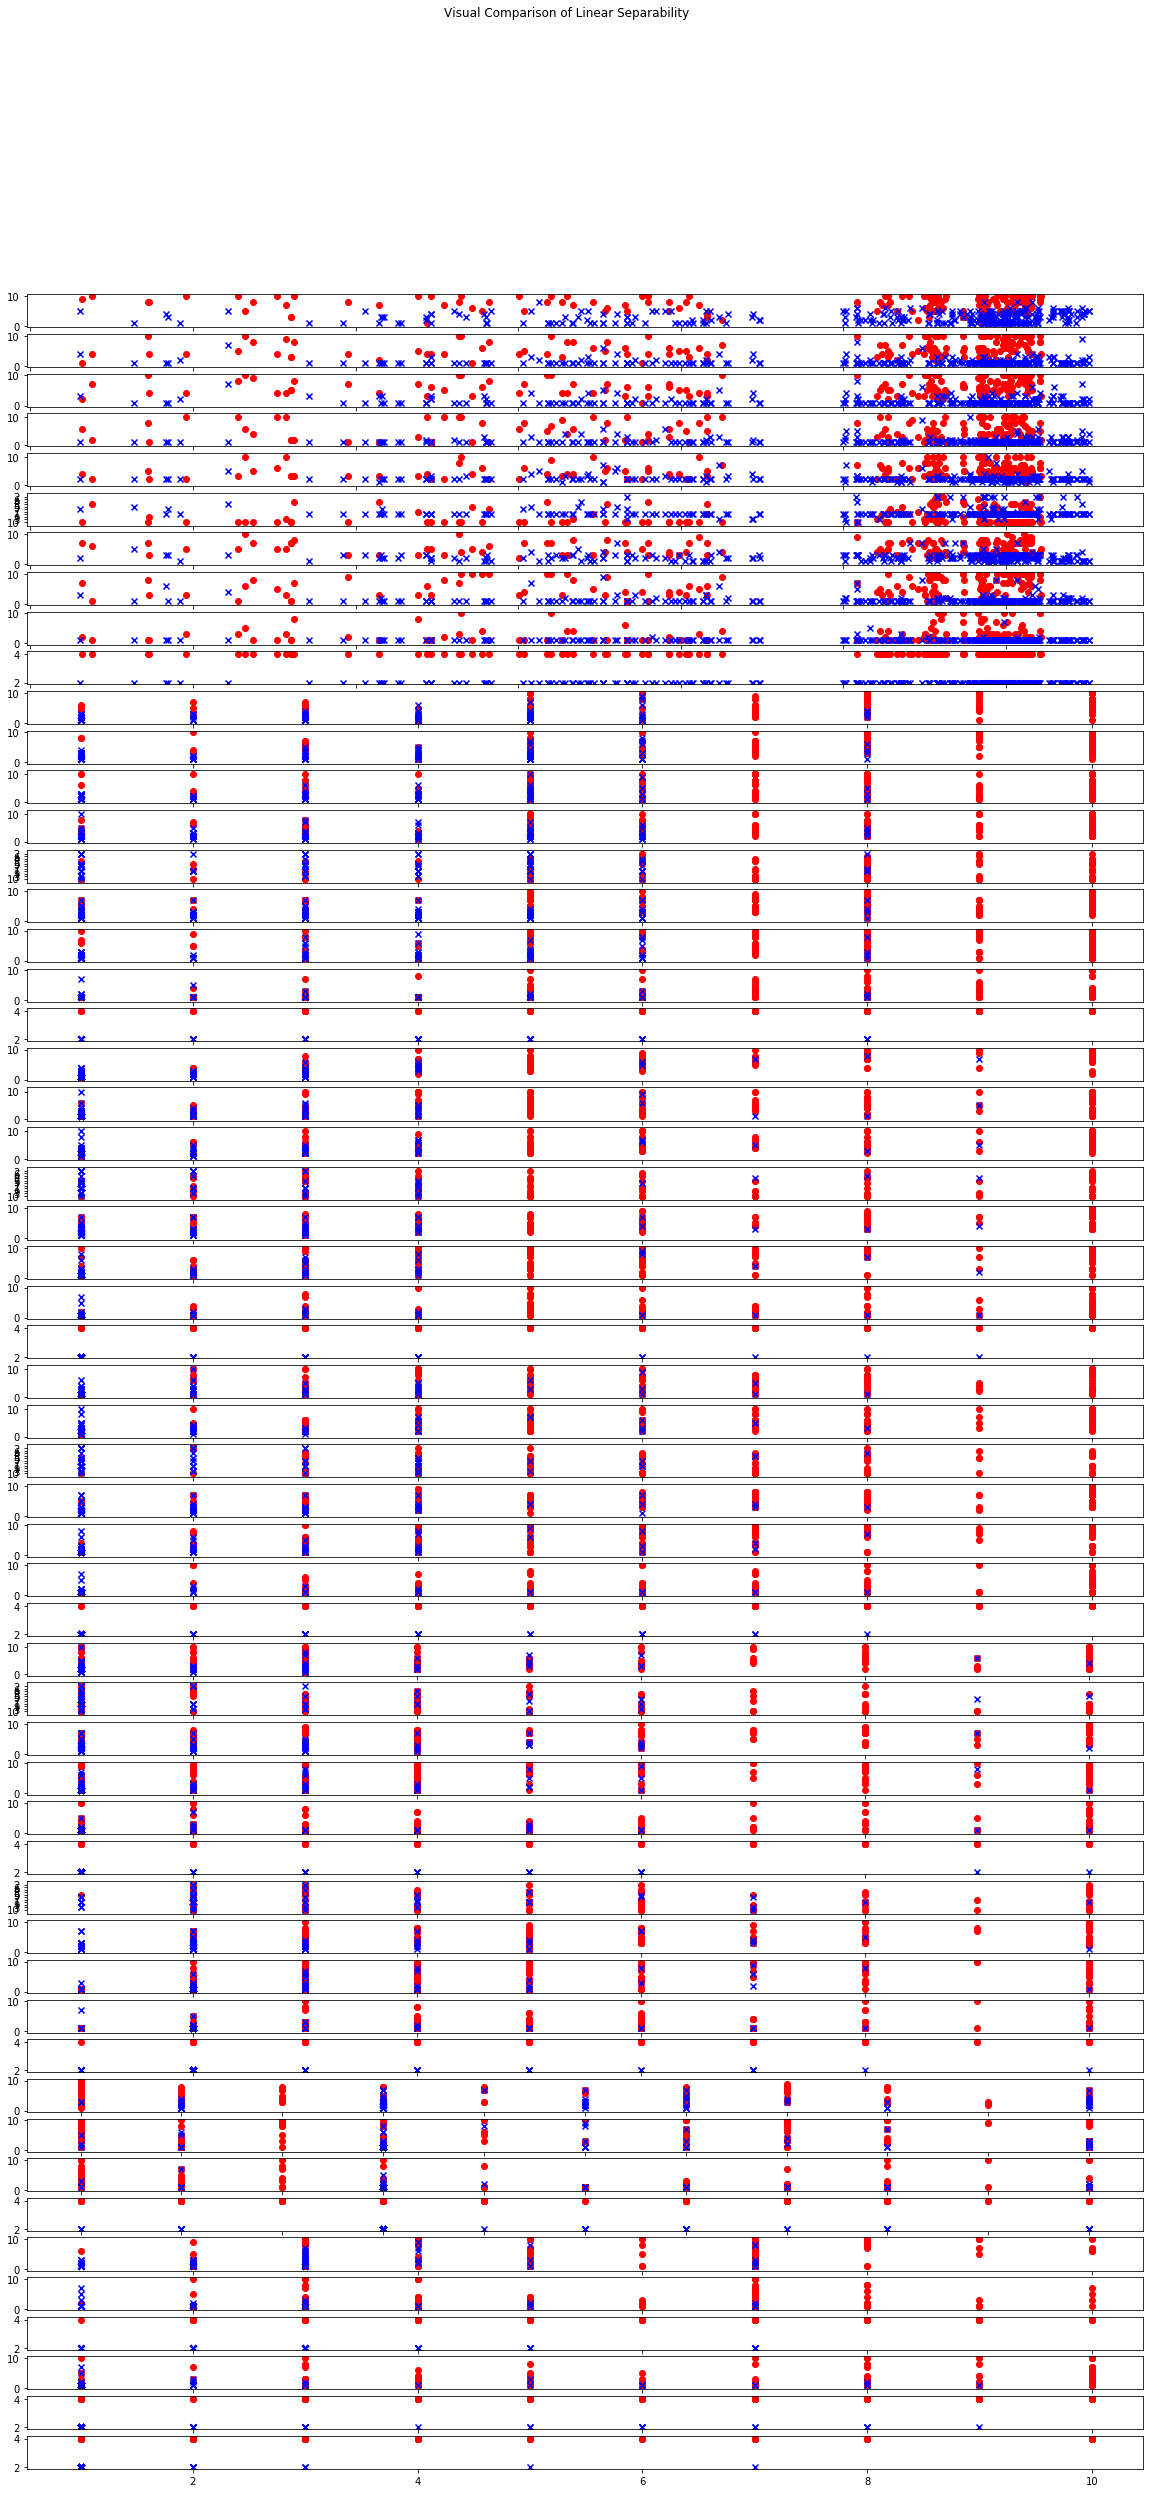

In [36]:
def every_unique_pair(mylist):
    """returns every positionally unique pair in a given list: assumes that no elements in the list appear more than once"""
    ret_list = []
    list_copy = mylist[1:].copy()
    for i in mylist:
        for j in list_copy:
            ret_list.append([i,j])
        list_copy = list_copy[1:]
    return ret_list

figure,subplotx = pp.subplots(len(every_unique_pair(cancer_data.columns)))
figure.suptitle('Visual Comparison of Linear Separability')
figure.set_size_inches(20, 40)
for i, pair in enumerate(every_unique_pair(cancer_data.columns)):
    c1,c2 = pair
    plot_classes_by_columns(subplotx[i], cancer_data, c1, c2)

In [84]:
class perceptron(object):
    """perceptron linear classifier"""
    
    def __init__(self, learning_rate=0.1, epochs=50, random_seed=1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.random_seed = random_seed
    
    def fit (self, X, y):
        unnormalized_weights = np.random.RandomState(self.random_seed)
        self.weights = unnormalized_weights.normal(loc=0.0, scale=0.1, size= 1 + X.shape[1])
    
        self.errors_ = []
    
        for _ in range(self.epochs): #iterate over the data set epochs times
            errors = 0
            for xi, target in zip(X, y):
                delta_weights = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += delta_weights * xi
                self.weights[0] += delta_weights
                errors += int(delta_weights != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input (self, X):
        """calculate net input"""
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def predict (self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [6]:
x = [1, 2, 3]
x = x[1:]
y = x
y.append(3)
y

[2, 3, 3]

In [24]:
for i,pair in enumerate(every_pair(cancer_data.columns)):
    print(i, pair)

0 ['id', 'thickness']
1 ['id', 'size uniformity']
2 ['id', 'shape uniformity']
3 ['id', 'marginal adhesion']
4 ['id', 'epi cell size']
5 ['id', 'bare nuclei']
6 ['id', 'bland chromatin']
7 ['id', 'normal nucleoi']
8 ['id', 'mitoses']
9 ['id', 'class']
10 ['thickness', 'size uniformity']
11 ['thickness', 'shape uniformity']
12 ['thickness', 'marginal adhesion']
13 ['thickness', 'epi cell size']
14 ['thickness', 'bare nuclei']
15 ['thickness', 'bland chromatin']
16 ['thickness', 'normal nucleoi']
17 ['thickness', 'mitoses']
18 ['thickness', 'class']
19 ['size uniformity', 'shape uniformity']
20 ['size uniformity', 'marginal adhesion']
21 ['size uniformity', 'epi cell size']
22 ['size uniformity', 'bare nuclei']
23 ['size uniformity', 'bland chromatin']
24 ['size uniformity', 'normal nucleoi']
25 ['size uniformity', 'mitoses']
26 ['size uniformity', 'class']
27 ['shape uniformity', 'marginal adhesion']
28 ['shape uniformity', 'epi cell size']
29 ['shape uniformity', 'bare nuclei']
30 ['sh